实验内容
1.人口统计分析
(1)国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。

In [2]:
import pandas as pd

data = pd.read_csv('D:\\Data_code\\Courses\\ItDSaE\\hw12_users_combined_info_500.csv')

# 查看数据的基本信息，确认是否包含国家/地区信息
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294776 entries, 0 to 1294775
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1294776 non-null  int64  
 1   name             1294776 non-null  object 
 2   location         1294776 non-null  object 
 3   total_influence  1294776 non-null  float64
 4   country          1206625 non-null  object 
 5   event_type       1294776 non-null  object 
 6   event_action     1294776 non-null  object 
 7   event_time       1294776 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 79.0+ MB
None
   user_id    name     location  total_influence        country   event_type  \
0   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
1   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
2   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
3   663432  bdraco  

In [3]:
# 统计各个国家的分布
country_counts = data['country'].value_counts()

# 显示前30个国家,查看开发者集中地
print("前30个国家的分布：")
print(country_counts.head(30))

前30个国家的分布：
country
United States           305788
Germany                 182659
China                    73011
United Kingdom           71606
France                   59570
Canada                   58600
Netherlands              52367
Czechia                  48122
Japan                    46553
Switzerland              38093
Australia                35746
Italy                    30671
Poland                   20002
New Zealand              18444
Spain                    14939
Austria                  11758
Sweden                    9851
Finland                   8815
Denmark                   7412
Bulgaria                  7357
Hungary                   7080
Belgium                   6628
Norway                    6004
India                     5689
United Arab Emirates      5264
Singapore                 5205
Brazil                    5022
Hong Kong                 4767
Malaysia                  4538
Pakistan                  4462
Name: count, dtype: int64


In [4]:
import plotly.express as px
import pycountry  # 需要安装：pip install pycountry

# 创建国家名称到 ISO 代码的映射函数
def get_country_code(country_name):
    try:
        # 特殊情况处理
        if country_name == 'United States':
            return 'USA'
        elif country_name == 'United Kingdom':
            return 'GBR'
        elif country_name == 'Czechia':
            return 'CZE'
        elif country_name == 'Türkiye':
            return 'TUR'
        
        # 使用 pycountry 查找
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.alpha_3
        return None
    except:
        return None

# 创建包含 ISO 代码的数据框
country_data = pd.DataFrame({
    'country': country_counts.index,
    'count': country_counts.values
})
country_data['iso_alpha'] = country_data['country'].apply(get_country_code)

# 只保留有效的 ISO 代码
country_data = country_data.dropna(subset=['iso_alpha'])

# 使用 Plotly 绘制国家分布图
fig = px.choropleth(country_data, 
                    locations='iso_alpha',  # 使用 ISO 代码
                    color='count',
                    hover_name='country',  # 悬停显示国家名
                    title="GitHub 用户国家分布", 
                    color_continuous_scale="Viridis",
                    labels={'count': '用户数量'})

fig.update_geos(showcoastlines=True, 
                coastlinecolor="Black", 
                projection_type="natural earth")

fig.show()


(2)城市级别分布：分析主要城市的开发者密度，发现技术热点区域。

In [7]:
# 统计各个城市的开发者数量
city_counts = data['location'].value_counts()

# 显示前30个城市
print("前30个城市的开发者分布：")
print(city_counts.head(30))


前30个城市的开发者分布：
location
Germany                      107747
Prague                        37757
Japan                         26986
Palo Alto, CA                 19215
UK                            17789
NYC                           16381
San Francisco                 16271
Paris, France                 16021
Switzerland                   15555
Houston, TX                   15449
Edinburgh, UK                 15308
France                        15128
Berlin, Germany               15095
Tokyo, Japan                  14877
New York                      12893
Milan                         12704
San Francisco, CA             11271
Enschede, The Netherlands     11218
Berlin                        10883
Cambridge, MA                 10740
New Zealand                   10376
The Internet                  10060
Beijing                        9591
London, UK                     9180
New York, NY                   8803
Netherlands                    8438
きさらぎ駅                          8401
Zuric

In [8]:
# 使用 Plotly 绘制城市分布柱状图
fig = px.bar(city_counts.head(20), 
             x=city_counts.head(20).index, 
             y=city_counts.head(20).values,
             title="GitHub 用户在主要城市的分布", 
             labels={'x': '城市', 'y': '开发者数量'})
fig.update_layout(xaxis_tickangle=-45)  # 设置x轴标签的角度，使其不重叠
fig.show()

In [9]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# 初始化地理编码器
geolocator = Nominatim(user_agent="my_github_analysis")

def get_lat_lon(city):
    try:
        # 添加延时避免请求过快
        time.sleep(1)
        location = geolocator.geocode(city)
        if location:
            return (location.latitude, location.longitude)
        return None
    except GeocoderTimedOut:
        return None

# 获取前100个城市的坐标（为了演示，可以根据需要调整数量）
city_data = []
for city, count in city_counts.head(100).items():
    coords = get_lat_lon(city)
    if coords:
        city_data.append({
            'city': city,
            'lat': coords[0],
            'lon': coords[1],
            'count': count
        })

# 转换为DataFrame
city_df = pd.DataFrame(city_data)

# 创建热力图
fig = px.density_mapbox(city_df, 
                       lat='lat', 
                       lon='lon', 
                       z='count',
                       radius=30,  # 热力点的半径
                       center=dict(lat=20, lon=0),  # 地图中心
                       zoom=1,  # 缩放级别
                       title='GitHub 开发者全球城市分布热力图',
                       mapbox_style='carto-positron',  # 地图样式
                       labels={'count': '开发者数量'})

fig.update_layout(
    mapbox=dict(
        style='carto-positron',
    ),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

(3)时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。

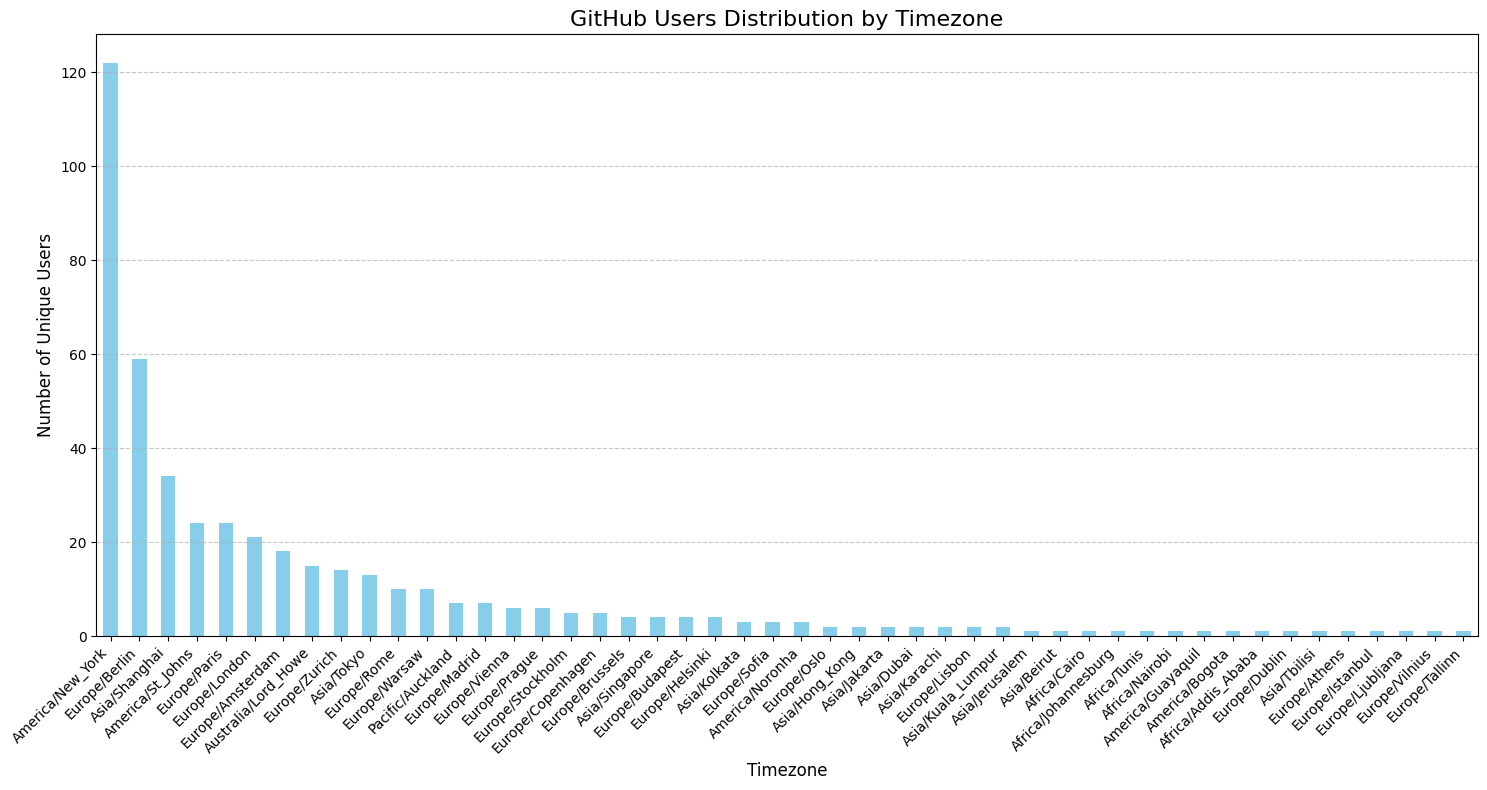


时区分布统计：
timezone
America/New_York       122
Europe/Berlin           59
Asia/Shanghai           34
America/St_Johns        24
Europe/Paris            24
Europe/London           21
Europe/Amsterdam        18
Australia/Lord_Howe     15
Europe/Zurich           14
Asia/Tokyo              13
Europe/Rome             10
Europe/Warsaw           10
Pacific/Auckland         7
Europe/Madrid            7
Europe/Vienna            6
Europe/Prague            6
Europe/Stockholm         5
Europe/Copenhagen        5
Europe/Brussels          4
Asia/Singapore           4
Europe/Budapest          4
Europe/Helsinki          4
Asia/Kolkata             3
Europe/Sofia             3
America/Noronha          3
Europe/Oslo              2
Asia/Hong_Kong           2
Asia/Jakarta             2
Asia/Dubai               2
Asia/Karachi             2
Europe/Lisbon            2
Asia/Kuala_Lumpur        2
Asia/Jerusalem           1
Asia/Beirut              1
Africa/Cairo             1
Africa/Johannesburg      1
Africa/Tun

In [12]:
import matplotlib.pyplot as plt
from pytz import country_timezones

# 定义国家名称到 alpha-2 代码的映射函数
def get_country_alpha2(country_name):
    try:
        # 特殊情况处理
        if country_name == 'United States':
            return 'US'
        elif country_name == 'United Kingdom':
            return 'GB'
        elif country_name == 'Czechia':
            return 'CZ'
        elif country_name == 'Türkiye':
            return 'TR'
        
        # 使用 pycountry 查找
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.alpha_2
        return None
    except:
        return None

# 定义国家到时区的映射
def get_timezone_from_country(country_name):
    alpha2 = get_country_alpha2(country_name)
    if alpha2:
        try:
            timezones = country_timezones[alpha2]
            return timezones[0]  # 如果有多个时区，默认选择第一个
        except KeyError:
            return 'Unknown'
    return 'Unknown'

# 为每个用户添加时区信息
data['timezone'] = data['country'].apply(get_timezone_from_country)

# 按用户ID和时区分组，然后计算每个时区的唯一用户数
timezone_user_counts = data.groupby('timezone')['user_id'].nunique().sort_values(ascending=False)

# 过滤掉 'Unknown' 时区（如果需要的话）
timezone_user_counts = timezone_user_counts[timezone_user_counts.index != 'Unknown']

# 可视化时区分布
plt.figure(figsize=(15, 8))
timezone_user_counts.plot(kind='bar', color='skyblue')
plt.title('GitHub Users Distribution by Timezone', fontsize=16)
plt.xlabel('Timezone', fontsize=12)
plt.ylabel('Number of Unique Users', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 打印具体数据
print("\n时区分布统计：")
print(timezone_user_counts)

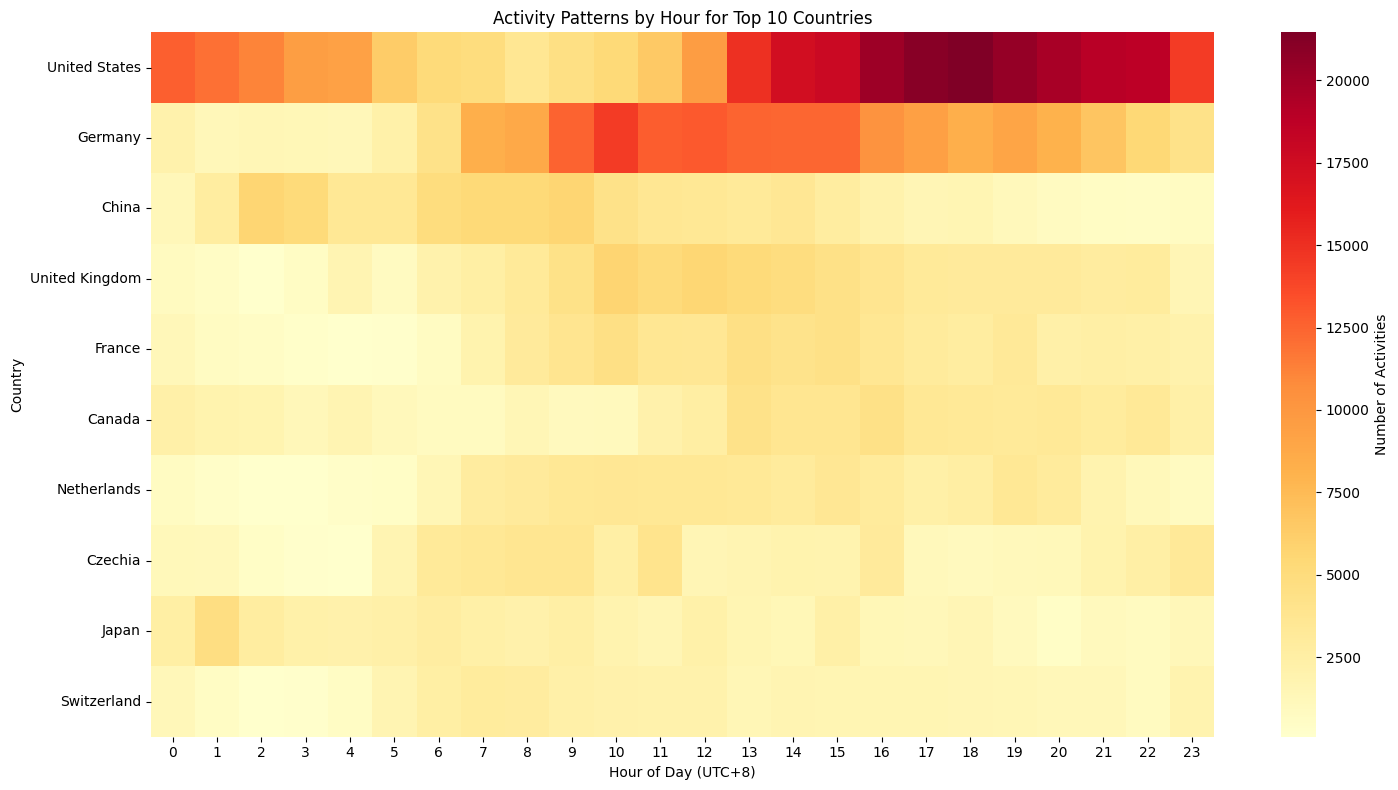


各国活动高峰时段（UTC+8）：
country
United States     18
Germany           10
China              9
United Kingdom    10
France            13
Canada            16
Netherlands       15
Czechia           11
Japan              1
Switzerland        7
dtype: int32


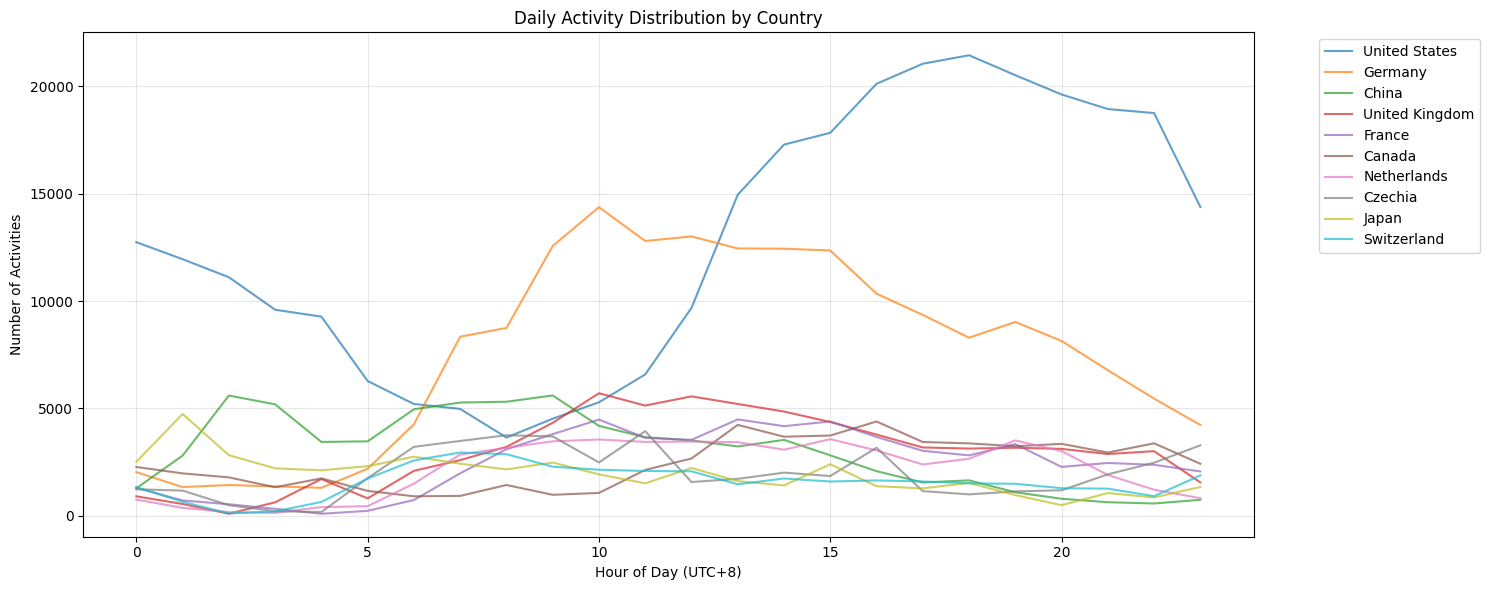


各国工作时间（9-17点）活动占比：
country
United States     38.37%
Germany           60.06%
China             41.33%
United Kingdom    58.84%
France            59.12%
Canada            44.95%
Netherlands       56.21%
Czechia           44.90%
Japan             34.89%
Switzerland       43.70%
dtype: object


C:\Users\20826\AppData\Local\Temp\ipykernel_82332\2204402110.py:57: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [13]:
# 分析不同地区用户的协作时间模式
import seaborn as sns

# 将event_time转换为datetime类型
data['event_time'] = pd.to_datetime(data['event_time'])

# 提取小时信息
data['hour'] = data['event_time'].dt.hour

# 按国家和小时分组统计活动次数
country_hour_counts = data.groupby(['country', 'hour']).size().unstack()

# 选择活动量最大的前10个国家进行可视化
top_10_countries = data['country'].value_counts().head(10).index

# 创建热力图
plt.figure(figsize=(15, 8))
sns.heatmap(country_hour_counts.loc[top_10_countries], 
            cmap='YlOrRd',
            cbar_kws={'label': 'Number of Activities'},
            fmt='g')

plt.title('Activity Patterns by Hour for Top 10 Countries')
plt.xlabel('Hour of Day (UTC+8)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 分析每个国家的高峰时段
peak_hours = country_hour_counts.idxmax(axis=1)
print("\n各国活动高峰时段（UTC+8）：")
print(peak_hours[top_10_countries])

# 计算每个国家的活动时间分布
plt.figure(figsize=(15, 6))
for country in top_10_countries:
    country_data = data[data['country'] == country]
    hour_dist = country_data['hour'].value_counts().sort_index()
    plt.plot(hour_dist.index, hour_dist.values, label=country, alpha=0.7)

plt.title('Daily Activity Distribution by Country')
plt.xlabel('Hour of Day (UTC+8)')
plt.ylabel('Number of Activities')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 计算工作时间（9-17点）vs非工作时间的活动比例
def calculate_work_hours_ratio(group):
    work_hours = group[(group['hour'] >= 9) & (group['hour'] <= 17)].shape[0]
    total = group.shape[0]
    return work_hours / total if total > 0 else 0

work_ratio = data.groupby('country').apply(calculate_work_hours_ratio).sort_values(ascending=False)

print("\n各国工作时间（9-17点）活动占比：")
print(work_ratio[top_10_countries].apply(lambda x: f"{x:.2%}"))

2.协作行为分析
提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。

活动频率统计信息：
count      497.000000
mean      2605.183099
std       3182.585434
min         75.000000
25%       1463.000000
50%       2026.000000
75%       2716.000000
max      37960.000000
dtype: float64


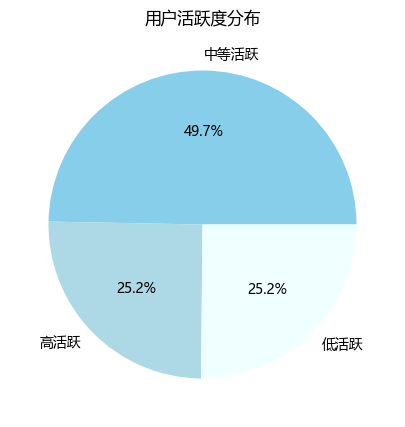

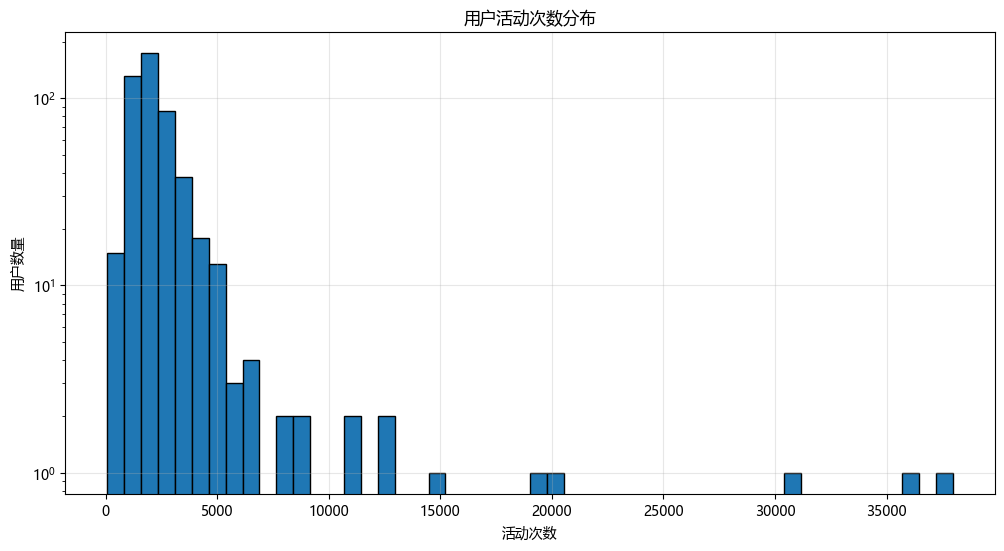


高活跃用户主要来源国家：
country
United States     140372
Germany           110012
United Kingdom     47372
Czechia            42746
Japan              32824
China              32097
France             31484
Netherlands        30842
Canada             25833
Australia          19477
Name: count, dtype: int64

高活跃用户主要活动类型：
event_type
PushEvent                        225401
PullRequestEvent                 100033
PullRequestReviewEvent            77732
IssueCommentEvent                 65220
CreateEvent                       61958
DeleteEvent                       57142
PullRequestReviewCommentEvent     40088
IssuesEvent                       15354
ReleaseEvent                       6435
WatchEvent                         2027
ForkEvent                          1369
CommitCommentEvent                  320
MemberEvent                         166
GollumEvent                         144
PublicEvent                          16
Name: count, dtype: int64

用户活动时间跨度统计（天）：
count    497.000000
mean      59.04

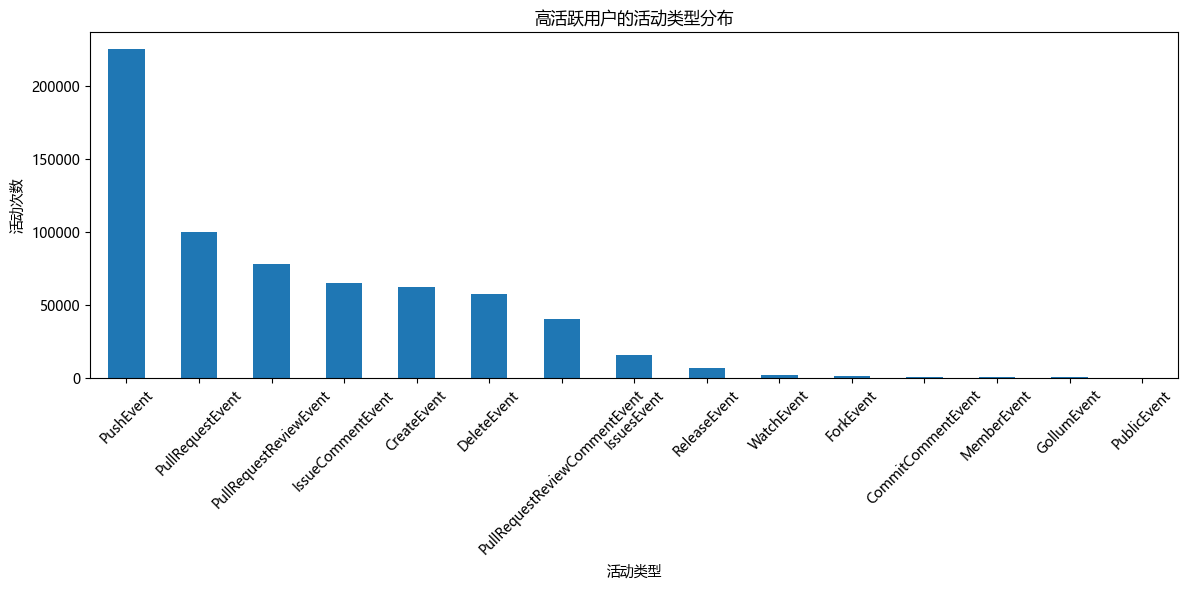

In [10]:
# 设置中文字体
plt.rcParams['font.family'] = 'Microsoft YaHei'
# 统计每个用户的活动次数
user_activity = data.groupby('user_id').size().sort_values(ascending=False)

# 计算活动频率的基本统计信息
activity_stats = user_activity.describe()
print("活动频率统计信息：")
print(activity_stats)

# 定义活跃度分类函数
def classify_activity(count, percentile_75=activity_stats['75%'], percentile_25=activity_stats['25%']):
    if count >= percentile_75:
        return '高活跃'
    elif count <= percentile_25:
        return '低活跃'
    else:
        return '中等活跃'

# 创建用户活跃度分类
user_categories = user_activity.apply(classify_activity)
category_counts = user_categories.value_counts()

# 绘制用户活跃度分布饼图
plt.figure(figsize=(7, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=["#87CEEB","#ADD8E6","#F0FFFF"])
plt.title('用户活跃度分布')
plt.show()

# 绘制用户活动次数分布直方图
plt.figure(figsize=(12, 6))
plt.hist(user_activity, bins=50, edgecolor='black')
plt.title('用户活动次数分布')
plt.xlabel('活动次数')
plt.ylabel('用户数量')
plt.yscale('log')  # 使用对数刻度更好地展示分布
plt.grid(True, alpha=0.3)
plt.show()

# 分析高活跃用户的特征
high_active_users = user_activity[user_activity >= activity_stats['75%']]
high_active_data = data[data['user_id'].isin(high_active_users.index)]

# 统计高活跃用户的国家分布
high_active_countries = high_active_data['country'].value_counts().head(10)
print("\n高活跃用户主要来源国家：")
print(high_active_countries)

# 分析高活跃用户的活动类型
high_active_events = high_active_data['event_type'].value_counts()
print("\n高活跃用户主要活动类型：")
print(high_active_events)

# 计算用户活跃度的时间连续性
user_time_spans = data.groupby('user_id').agg({
    'event_time': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).days
}).sort_values('event_time', ascending=False)

print("\n用户活动时间跨度统计（天）：")
print(user_time_spans['event_time'].describe())

# 绘制高活跃用户的活动类型分布
plt.figure(figsize=(12, 6))
high_active_events.plot(kind='bar')
plt.title('高活跃用户的活动类型分布')
plt.xlabel('活动类型')
plt.ylabel('活动次数')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3.其他维度有趣的洞察（3个）

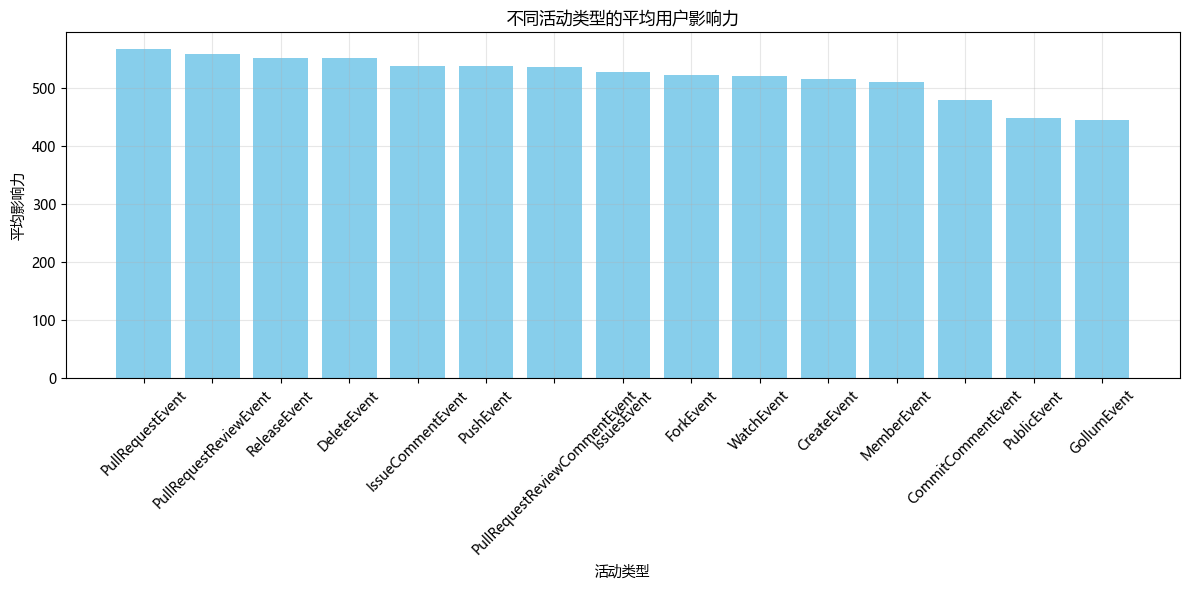


高影响力用户的主要活动类型：
event_type
PushEvent                        97125
PullRequestEvent                 60443
PullRequestReviewEvent           41861
IssueCommentEvent                41517
DeleteEvent                      24587
CreateEvent                      23142
PullRequestReviewCommentEvent    20347
IssuesEvent                      13303
ReleaseEvent                      3310
WatchEvent                         958
ForkEvent                          302
CommitCommentEvent                  92
MemberEvent                         91
GollumEvent                         60
PublicEvent                          6
Name: count, dtype: int64


In [23]:
# 1. 用户影响力与活动类型的关系分析
# 识别哪些类型的活动与用户影响力最相关
# 了解高影响力用户的行为模式
# 发现可能的因果关系

# 设置中文字体
plt.rcParams['font.family'] = 'Microsoft YaHei'

plt.figure(figsize=(12, 6))
influence_by_event = data.groupby('event_type')['total_influence'].mean().sort_values(ascending=False)

plt.bar(influence_by_event.index, influence_by_event.values, color='skyblue')
plt.title('不同活动类型的平均用户影响力')
plt.xlabel('活动类型')
plt.ylabel('平均影响力')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 计算高影响力用户的主要活动模式
high_influence_threshold = data['total_influence'].quantile(0.75)
high_influence_users = data[data['total_influence'] >= high_influence_threshold]
high_influence_events = high_influence_users['event_type'].value_counts()

print("\n高影响力用户的主要活动类型：")
print(high_influence_events)

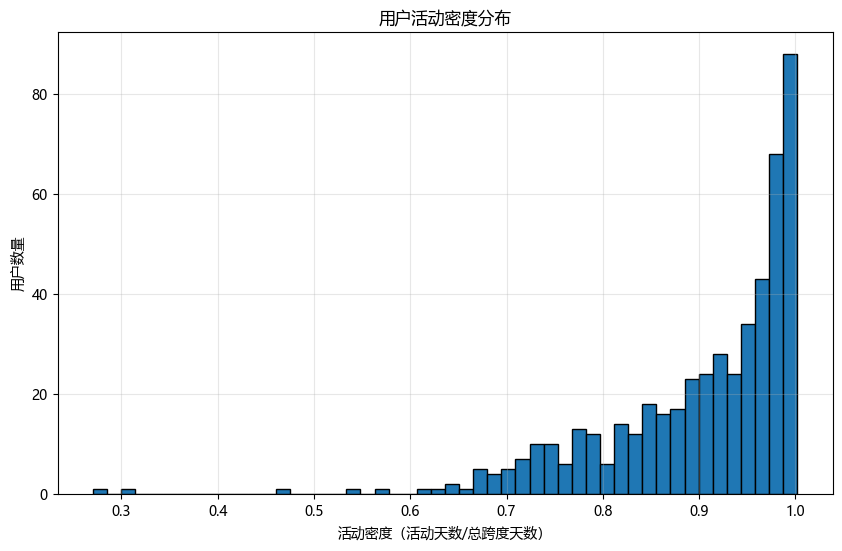


用户活动连续性统计：

活动天数统计：
count    497.000000
mean      54.674044
std        7.192513
min       14.000000
25%       51.000000
50%       57.000000
75%       60.000000
max       61.000000
Name: nunique_dates, dtype: float64

活动密度统计：
count    497.000000
mean       0.900815
std        0.102333
min        0.270233
25%        0.850083
50%        0.934997
75%        0.983004
max        1.001966
Name: activity_density, dtype: float64

稳定活跃用户数量：95
占总用户比例：19.11%

稳定活跃用户的主要活动类型：
event_type
PushEvent                 111604
IssueCommentEvent          49363
PullRequestEvent           43346
PullRequestReviewEvent     38147
CreateEvent                35014
Name: count, dtype: int64


In [25]:
# 2. 用户协作行为的连续性分析
# 用户活动的连续性和稳定性
# 活动密度分布
# 日均活动次数分布
# 稳定活跃用户的特征
# 首先确保event_time是datetime类型
data['event_time'] = pd.to_datetime(data['event_time'])

# 直接使用event_time进行分析，不再创建date列
user_activity_dates = data.groupby('user_id')['event_time'].agg([
    ('nunique_dates', lambda x: len(x.dt.date.unique())),
    ('min_date', 'min'),
    ('max_date', 'max')
]).reset_index()

# 计算日期跨度（天数）
user_activity_dates['date_span'] = (user_activity_dates['max_date'] - user_activity_dates['min_date']).dt.total_seconds() / (24*60*60)
user_activity_dates['activity_density'] = user_activity_dates['nunique_dates'] / (user_activity_dates['date_span'] + 1)

# 绘制活动密度分布
plt.figure(figsize=(10, 6))
plt.hist(user_activity_dates['activity_density'], bins=50, edgecolor='black')
plt.title('用户活动密度分布')
plt.xlabel('活动密度（活动天数/总跨度天数）')
plt.ylabel('用户数量')
plt.grid(True, alpha=0.3)
plt.show()

# 输出统计信息
print("\n用户活动连续性统计：")
print("\n活动天数统计：")
print(user_activity_dates['nunique_dates'].describe())

print("\n活动密度统计：")
print(user_activity_dates['activity_density'].describe())

# 识别最稳定活跃的用户
stable_active_users = user_activity_dates[
    (user_activity_dates['activity_density'] > user_activity_dates['activity_density'].quantile(0.75)) &
    (user_activity_dates['date_span'] > user_activity_dates['date_span'].quantile(0.5))
]

print(f"\n稳定活跃用户数量：{len(stable_active_users)}")
print(f"占总用户比例：{len(stable_active_users) / len(user_activity_dates):.2%}")

# 分析稳定活跃用户的特征
stable_users_data = data[data['user_id'].isin(stable_active_users['user_id'])]
print("\n稳定活跃用户的主要活动类型：")
print(stable_users_data['event_type'].value_counts().head())

<Figure size 1500x800 with 0 Axes>

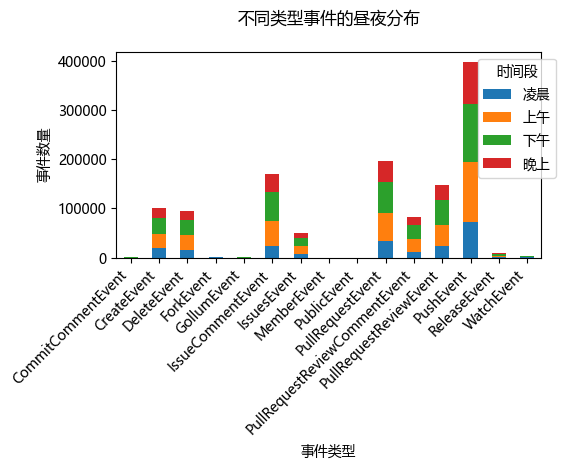


各时间段的主要活动类型：

上午时段最常见的活动：
event_type
PushEvent                 122097
PullRequestEvent           57215
IssueCommentEvent          49438
PullRequestReviewEvent     43626
DeleteEvent                30191
Name: count, dtype: int64

下午时段最常见的活动：
event_type
PushEvent                 118611
PullRequestEvent           62906
IssueCommentEvent          59243
PullRequestReviewEvent     49636
CreateEvent                31082
Name: count, dtype: int64

凌晨时段最常见的活动：
event_type
PushEvent                 72091
PullRequestEvent          33831
IssueCommentEvent         24604
PullRequestReviewEvent    23773
CreateEvent               20327
Name: count, dtype: int64

晚上时段最常见的活动：
event_type
PushEvent                 85755
PullRequestEvent          41544
IssueCommentEvent         36656
PullRequestReviewEvent    30784
CreateEvent               21080
Name: count, dtype: int64


C:\Users\20826\AppData\Local\Temp\ipykernel_82332\2979812523.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [28]:
# 3. 事件类型的昼夜分布模式
# 了解不同类型活动的时间偏好
# 发现用户的工作习惯
# 优化协作时间安排
# 确保event_time是datetime类型
data['event_time'] = pd.to_datetime(data['event_time'])
data['hour'] = data['event_time'].dt.hour

# 使用dropna确保没有NaN值
data['time_period'] = pd.cut(data['hour'], 
                            bins=[0, 6, 12, 18, 24],
                            labels=['凌晨', '上午', '下午', '晚上'])
data = data.dropna(subset=['time_period'])

# 创建事件类型和时间段的交叉表
event_time_dist = pd.crosstab(data['event_type'], data['time_period'])

# 绘制堆叠柱状图，调整图形大小和布局
plt.figure(figsize=(15, 8))  # 增加图形宽度
event_time_dist.plot(kind='bar', stacked=True)
plt.title('不同类型事件的昼夜分布', pad=20)  # 增加标题和图形的间距
plt.xlabel('事件类型')
plt.ylabel('事件数量')

# 调整x轴标签
plt.xticks(rotation=45, ha='right')  # 添加ha='right'使文字右对齐
plt.legend(title='时间段', bbox_to_anchor=(1.05, 1))

# 调整布局，确保所有元素可见
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # 为图例留出空间
plt.show()

# 计算每个时间段的主要活动类型
time_period_events = data.groupby('time_period')['event_type'].value_counts()
print("\n各时间段的主要活动类型：")
for period in sorted(data['time_period'].unique()):  # 使用sorted确保顺序一致
    print(f"\n{period}时段最常见的活动：")
    print(time_period_events[period].head())